In [0]:
!pip install mxnet-cu100

#MXNet (From Scratch)

In [0]:
import mxnet as mx
from mxnet import nd
import matplotlib.pyplot as plt

ctx = mx.gpu()

#Understanding convolution

##Getting a sample image from web

In [0]:
mx.gluon.utils.download('http://i.stack.imgur.com/397vv.png')

'397vv.png'

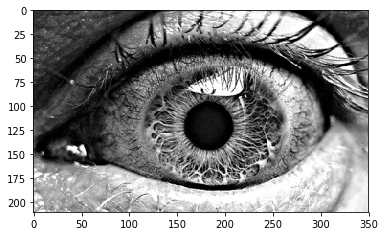

(211, 350)

In [0]:
image = mx.image.imread('397vv.png', flag = 0).flatten().astype('float32').as_in_context(ctx)
# flag 0 for grayscale image with channel 1, flag 1 for coloured image with channel 3
# flatten converts image to 2d, that is: it converts shape (211, 350, 1) to (211, 350)

plt.imshow(image.asnumpy(), cmap = 'gray')
plt.show()

image.shape

In [0]:
def convolution(inputs, kernal):
    filter_hight, filter_width = kernal.shape
    hight, width = inputs.shape[0] - filter_hight + 1, inputs.shape[1] - filter_width + 1
    layer = nd.zeros((hight, width))
    for i in range(layer.shape[0]):
        for j in range(layer.shape[1]):
            layer[i, j] = (inputs[i:i + filter_hight, j:j + filter_width] * kernal).sum()
    return layer

## This filter we are using below can detect vertical edges in the image

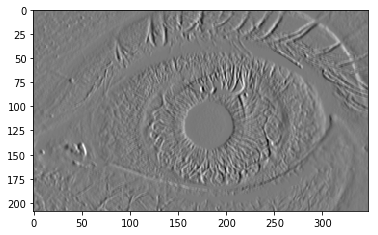

(209, 348)

In [0]:
kernal = nd.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]], ctx = ctx)

output = convolution(image, kernal)

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape

## This filter we are using below can detect horizontal edges in the image

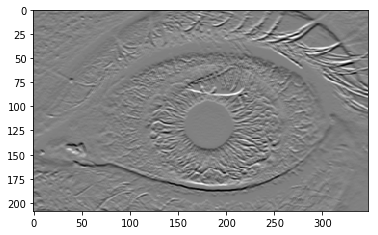

(209, 348)

In [0]:
kernal = nd.array([[1, 1, 1],
                   [0, 0, 0],
                   [-1, -1, -1]], ctx = ctx)

output = convolution(image, kernal)

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape

##Lets see some more examples with different types of filters.

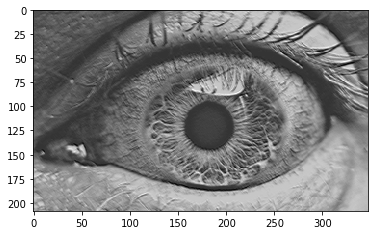

(209, 348)

In [0]:
kernal = nd.random.normal(0, 1, (3, 3)).as_in_context(ctx)
# wondering what this random filter would generate?? Me too!! lets see.

output = convolution(image, kernal)

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape

## Time to check out a 5 by 5 random filter

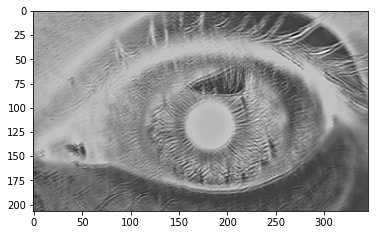

(207, 346)

In [0]:
kernal = nd.random.normal(0, 1, (5, 5)).as_in_context(ctx)

output = convolution(image, kernal)

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape

# this looks more or less like a ghost :)

## Lets try one more time

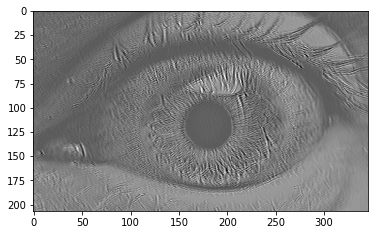

(207, 346)

In [0]:
kernal = nd.random.normal(0, 1, (5, 5)).as_in_context(ctx)

output = convolution(image, kernal)

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape

## Lets try 7 by 7 this time

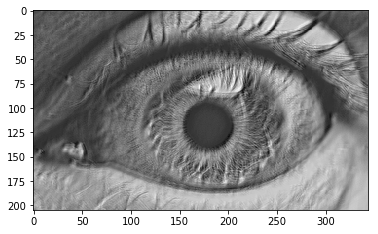

(205, 344)

In [0]:
kernal = nd.random.normal(0, 1, (7, 7)).as_in_context(ctx)

output = convolution(image, kernal)

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape

##Now lets look at convolution with strides

###Strides determines how many pixels does a kernel need to step(or skip) to perform next operation(multiplying kernel values with corresponding pixel values and adding them up) with image pixels.

In [0]:
def convolution_with_strides(inputs, kernal, strides = (1, 1)):
    filter_hight, filter_width = kernal.shape
    hight, width = ((inputs.shape[0] - filter_hight)/strides[0]) + 1, ((inputs.shape[1] - filter_width)/strides[1]) + 1
    print(hight, width)
    layer = nd.zeros((int(hight), int(width)))
    for i in range(0, layer.shape[0], strides[0]):
        for j in range(0, layer.shape[1], strides[1]):
            layer[i, j] = (inputs[i:i + filter_hight, j:j + filter_width] * kernal).sum()
    return layer

205.0 344.0


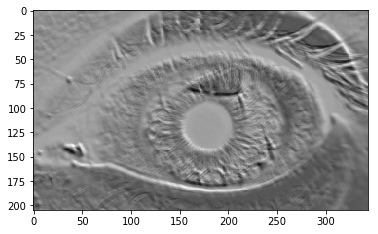

(205, 344)

In [0]:
kernal = nd.random.normal(0, 1, (7, 7)).as_in_context(ctx)

output = convolution_with_strides(image, kernal)

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape

##Time to do convolution with padding

##Understanding how to pad tensors in mxnet


[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
<NDArray 5x5 @cpu(0)>


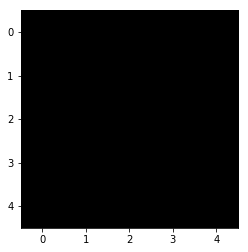


[[0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]]
<NDArray 5x7 @cpu(0)>


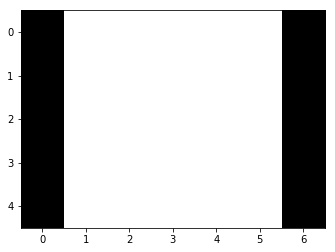


[[0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
<NDArray 7x7 @cpu(0)>


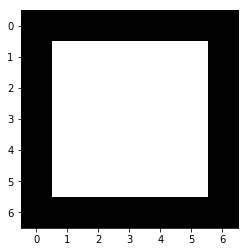

In [0]:
x = nd.ones((5, 5))
print(x)
plt.imshow(x.asnumpy(), cmap = 'gray')
plt.show()

ht, hb, vl, vr, = nd.zeros((1, 7)), nd.zeros((1, 7)), nd.zeros((5, 1)), nd.zeros((5, 1))
# (1, 7) because after adding 2 columns at left and right we are gonna have total 5 + 1 + 1 columns 

y = nd.concat(vl, x, vr, dim = 1)
print(y)
plt.imshow(y.asnumpy(), cmap = 'gray')
plt.show()

y = nd.concat(ht, y, hb, dim = 0)
print(y)
plt.imshow(y.asnumpy(), cmap = 'gray')
plt.show()

In [0]:
def convolution_with_padding(inputs, kernal, padding = (1, 1)):
    filter_hight, filter_width = kernal.shape
    horizental_pad, vertical_pad = padding
    hight, width = (inputs.shape[0]  + (2 * vertical_pad) - filter_hight) + 1, (inputs.shape[1] + (2 * horizental_pad) - filter_width) + 1
    
    horizental_paddings = nd.zeros((horizental_pad, inputs.shape[1])).as_in_context(ctx)
    vertical_paddings = nd.zeros((inputs.shape[0] + 2 * horizental_pad, vertical_pad)).as_in_context(ctx)
    # + (2 * horizental_pad) because we are gonna add of 2 horizontal paddings 
    
    plt.imshow(inputs.asnumpy(), cmap = 'gray')
    plt.title(f'shape: {image.shape}')
    plt.show()
    
    inputs = nd.concat(horizental_paddings, inputs, horizental_paddings, dim = 0) # dim = 0 for concat alng rows
    inputs = nd.concat(vertical_paddings, inputs, vertical_paddings, dim = 1) # dim = 0 for concat alng columns
    
    plt.imshow(inputs.asnumpy(), cmap = 'gray')
    plt.title(f'shape: {image.shape}')
    plt.show()
    
    layer = nd.zeros((int(hight), int(width)))
    for i in range(0, layer.shape[0]):
        for j in range(0, layer.shape[1]):
            layer[i, j] = (inputs[i:i + filter_hight, j:j + filter_width] * kernal).sum()
    return layer

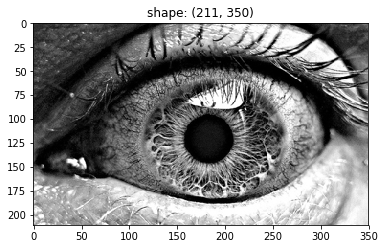

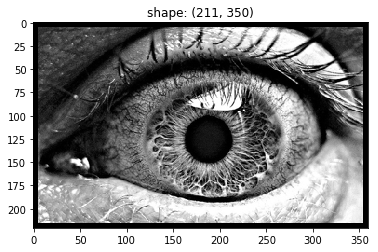

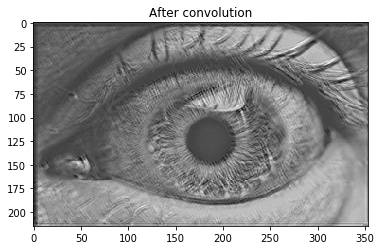

(215, 354)

In [0]:
kernal = nd.random.normal(0, 1, (7, 7)).as_in_context(ctx)

output = convolution_with_padding(image, kernal, padding = (5, 5))

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.title('After convolution')
plt.show()

output.shape

##Understanding Max Pooling and Average Pooling

In [0]:
# a simple convolution layer
def convolution(inputs, kernal):
    filter_hight, filter_width = kernal.shape
    hight, width = inputs.shape[0] - filter_hight + 1, inputs.shape[1] - filter_width + 1
    layer = nd.zeros((int(hight), int(width)))
    for i in range(0, layer.shape[0]):
        for j in range(0, layer.shape[1]):
            layer[i, j] = (inputs[i:i + filter_hight, j:j + filter_width] * kernal).sum()
    return layer

## Defining Max Pooling Layer

In [0]:
def maxpool(inputs, pooling = (3, 3)):
    pool_hight, pool_width = pooling.shape
    hight, width = inputs.shape[0] - pool_hight + 1, inputs.shape[1] - pool_width + 1
    layer = nd.zeros((int(hight), int(width)))
    for i in range(0, layer.shape[0]):
        for j in range(0, layer.shape[1]):
            layer[i, j] = inputs[i:i + pool_hight, j:j + pool_width].max()
    return layer

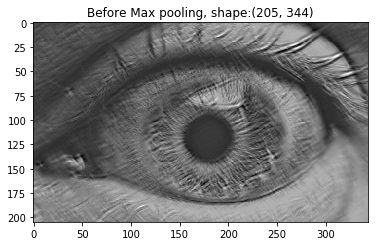

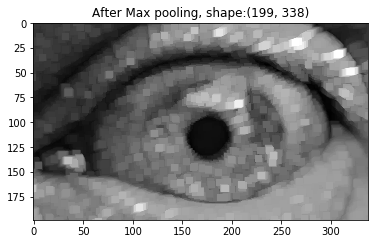

In [0]:
kernal = nd.random.normal(0, 1, (7, 7)).as_in_context(ctx)

output = convolution(image, kernal)

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.title(f'Before Max pooling, shape:{output.shape}')
plt.show()

output = maxpool(output, kernal)

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.title(f'After Max pooling, shape:{output.shape}')
plt.show()

## Defining Average Pooling Layer

In [0]:
def averagepool(inputs, pooling = (3, 3)):
    pool_hight, pool_width = pooling.shape
    hight, width = inputs.shape[0] - pool_hight + 1, inputs.shape[1] - pool_width + 1
    layer = nd.zeros((int(hight), int(width)))
    for i in range(0, layer.shape[0]):
        for j in range(0, layer.shape[1]):
            layer[i, j] = inputs[i:i + pool_hight, j:j + pool_width].mean()
    return layer

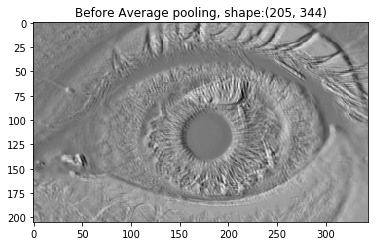

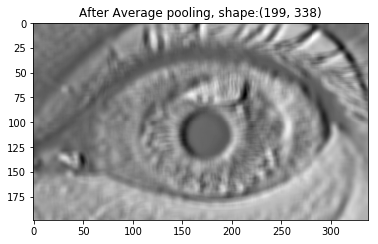

In [0]:
kernal = nd.random.normal(0, 1, (7, 7)).as_in_context(ctx)

output = convolution(image, kernal)

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.title(f'Before Average pooling, shape:{output.shape}')
plt.show()

output = averagepool(output, kernal)

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.title(f'After Average pooling, shape:{output.shape}')
plt.show()